In [ ]:
import numpy as np

In [ ]:
K = 10
# Create a vector whose entries sum to 1
p = np.random.randn(K) + 1e-3
p = p**2 / (p**2).sum()

In [ ]:
def sample_gumbel_max(shape):
  return -np.log(-np.log(np.random.rand(*shape, K)))
def sample_discrete(p, shape):
  K = len(p)
  # Use the gumbel-max trick to sample from discrete distribution given by p
  # We take the logits and add -log(-log(U)) noise where U is uniform random
  # The noise is a sample from the Gumbel distribution
  samples = np.log(p) + sample_gumbel_max(shape)
  samples = np.argmax(samples, axis=-1)
  return samples

In [ ]:
samples = sample_discrete(p, (10000,))

In [ ]:
from collections import Counter

sample_counts = Counter(samples)
freqs = np.array(list(sample_counts.values()))
p_hat = freqs / freqs.sum()

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5, 1.0, 'Sampled')

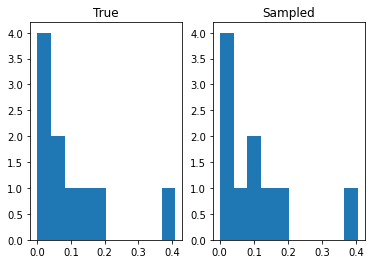

In [ ]:
fig, axes = plt.subplots(ncols=2)
axes[0].hist(p)
axes[0].set_title("True")
axes[1].hist(p_hat)
axes[1].set_title("Sampled")

In [ ]:
def sample_discrete_approximate(p, shape, temperature=1):
  K = len(p)
  # Use the gumbel-max trick to sample from discrete distribution given by p
  # We take the logits and add -log(-log(U)) noise where U is uniform random
  # The noise is a sample from the Gumbel distribution
  samples = np.log(p) + sample_gumbel_max(shape)
  from scipy import special
  samples = special.softmax(samples/temperature, axis=-1)
  return samples

In [ ]:
samples = sample_discrete_approximate(p, (10000, ), temperature=1).argmax(-1)

In [ ]:
sample_counts = Counter(samples)
freqs = np.array(list(sample_counts.values()))
p_hat = freqs / freqs.sum()

Text(0.5, 1.0, 'Sampled')

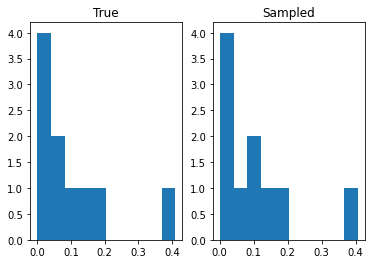

In [ ]:
fig, axes = plt.subplots(ncols=2)
axes[0].hist(p)
axes[0].set_title("True")
axes[1].hist(p_hat)
axes[1].set_title("Sampled")